## Let's start with a business problem:

## *Building a Customer 360 database and reducing customer churn with the Databricks Lakehouse*

In this demo, we'll step in the shoes of a retail company selling goods with a recurring business.

The business has determined that the focus must be placed on churn. We're asked to:

* Analyse and explain current customer churn: quantify churn, trends and the impact for the business
* Build a proactive system to forecast and reduce churn by taking automated action: targeted email, phoning etc.


### What we'll build

To do so, we'll build an end-to-end solution with the Lakehouse. To be able to properly analyse and predict our customer churn, we need information coming from different external systems: Customer profiles coming from our website, order details from our ERP system and mobile application clickstream to analyse our customers activity.

At a very high level, this is the flow we'll implement:

<img width="1000px" src="https://github.com/databricks-demos/dbdemos-resources/raw/main/images/retail/lakehouse-churn/lakehouse-retail-c360-churn-0.png" />

1. Ingest and create our Customer 360 database, with tables easy to query in SQL
2. Secure data and grant read access to the Data Analyst and Data Science teams.
3. Run BI queries to analyse existing churn
4. Build ML model to predict which customer is going to churn and why

As a result, we will have all the information required to trigger custom actions to increase retention (email personalized, special offers, phone call...)

### Our dataset

For simplicity, we will assume that an external system is periodically sending data into our blob cloud storage:

- Customer profile data *(name, age, address etc)*
- Orders history *(what ours customers have bought over time)*
- Events from our application *(when was the last time a customer used the application, what clics were recorded, typically collected through a stream)*

*Note that at our data could be arriving from any source. Databricks can ingest data from any system (SalesForce, Fivetran, queuing message like kafka, blob storage, SQL & NoSQL databases...).*

### Raw data generation

For this demonstration we will not be using real data or an existing dataset, but will rather generate them.

The cell below will execute a notebook that will generate the data and store it in a S3 bucket and governed by a unity catalog volume.


  Obtaining dependency information for Faker from https://files.pythonhosted.org/packages/c0/c3/0451555e7a9a233bc17f128cff7654ec60036d4ccbb8397dd949f28df176/Faker-33.0.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/1.9 MB ? eta -:--:--
   ━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.2/1.9 MB 4.4 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 28.5 MB/s eta 0:00:00
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


Generating the raw data


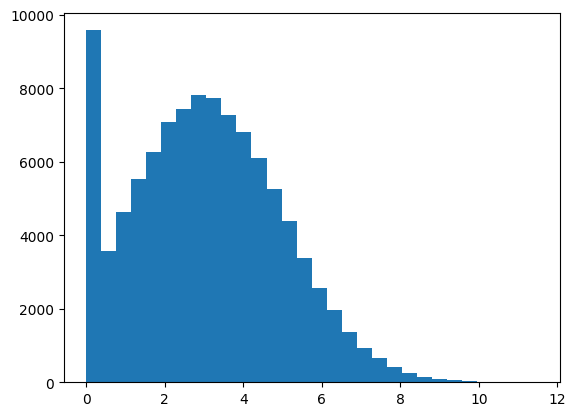

Generated 178061 orders and  712244 actions for 101333 users


In [0]:
%run ./includes/CreateRawData

In [0]:
ordersFolder = rawDataVolume + '/orders'
usersFolder = rawDataVolume + '/users'
eventsFolder = rawDataVolume + '/events'
print('Order raw data stored under the folder "' + ordersFolder + '"')
print('User raw data stored under the folder "' + usersFolder + '"')
print('Website event raw data stored under the folder "' + eventsFolder + '"')

Order raw data stored under the folder "/Volumes/main/odl_user_1513183_databrickslabs_com_retail/retail/orders"
User raw data stored under the folder "/Volumes/main/odl_user_1513183_databrickslabs_com_retail/retail/users"
Website event raw data stored under the folder "/Volumes/main/odl_user_1513183_databrickslabs_com_retail/retail/events"


## What we are going to implement

We will initially load the raw data with the autoloader,
perform some cleaning and enrichment operations,
develop and load a model from MLFlow to predict our customer churn,
and finally use this information to build our DBSQL dashboard to track customer behavior and churn.
 
<div><img width="1100px" src="https://raw.githubusercontent.com/QuentinAmbard/databricks-demo/main/retail/resources/images/lakehouse-retail/lakehouse-retail-churn-de-delta.png"/></div>

### Let's start with
[Data Engineering with Delta]($./01 - Data Engineering with Delta)